Start (green) position: (118, 112)
End (red) position: (515, 510)
Obstacle detected with area: 213444.0


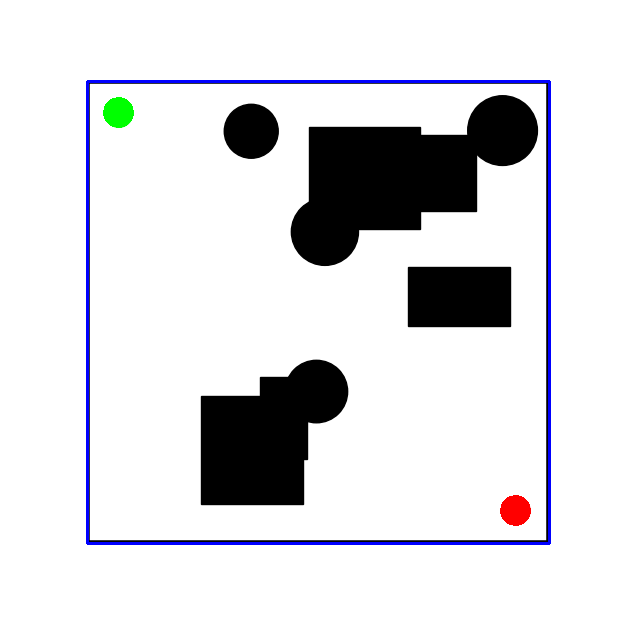

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image
img = cv2.imread('maze.png')

# Convert to HSV for color segmentation
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# --- Detect Start (Green) ---
lower_green = np.array([40, 100, 100])
upper_green = np.array([80, 255, 255])
mask_green = cv2.inRange(hsv, lower_green, upper_green)
contours_green, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours_green:
    (x, y), radius = cv2.minEnclosingCircle(cnt)
    center_green = (int(x), int(y))
    cv2.circle(img, center_green, int(radius), (0,255,0), 2)
    print("Start (green) position:", center_green)

# --- Detect End (Red) ---
# Red wraps around HSV, so two ranges
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)
contours_red, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours_red:
    (x, y), radius = cv2.minEnclosingCircle(cnt)
    center_red = (int(x), int(y))
    cv2.circle(img, center_red, int(radius), (0,0,255), 2)
    print("End (red) position:", center_red)

# --- Detect Obstacles (Black) ---
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, mask_black = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)
contours_black, _ = cv2.findContours(mask_black, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours_black:
    area = cv2.contourArea(cnt)
    if area > 100:  # Filter noise
        cv2.drawContours(img, [cnt], 0, (255,0,0), 2)
        print("Obstacle detected with area:", area)

# Show result using cv2_imshow instead of cv2.imshow
cv2_imshow(img)


Start (green) position (pixels): (118, 112)
End (red) position (pixels): (515, 510)
Rectangle: x=87, y=81, w=463, h=463 (pixels)


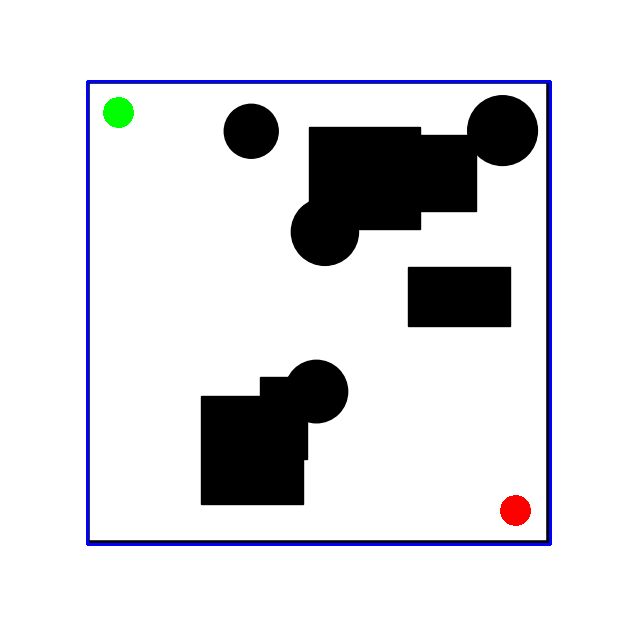

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image
img = cv2.imread('maze.png')
draw_img = img.copy()

# Convert to HSV for color segmentation
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# --- Detect Start (Green) ---
lower_green = np.array([40, 100, 100])
upper_green = np.array([80, 255, 255])
mask_green = cv2.inRange(hsv, lower_green, upper_green)
contours_green, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours_green:
    (x, y), radius = cv2.minEnclosingCircle(cnt)
    center_green = (int(x), int(y))
    cv2.circle(draw_img, center_green, int(radius), (0,255,0), 2)
    print("Start (green) position (pixels):", center_green)

# --- Detect End (Red) ---
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)
contours_red, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours_red:
    (x, y), radius = cv2.minEnclosingCircle(cnt)
    center_red = (int(x), int(y))
    cv2.circle(draw_img, center_red, int(radius), (0,0,255), 2)
    print("End (red) position (pixels):", center_red)

# --- Detect Obstacles (Black) and Classify ---
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, mask_black = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)
contours_black, _ = cv2.findContours(mask_black, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

rectangles = []
circles = []

for cnt in contours_black:
    area = cv2.contourArea(cnt)
    if area < 100:  # Filter noise
        continue

    # Approximate contour to check if it's a rectangle
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.04 * peri, True)
    if len(approx) == 4:
        # Rectangle
        x, y, w, h = cv2.boundingRect(approx)
        rectangles.append((x, y, w, h))
        cv2.rectangle(draw_img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        print(f"Rectangle: x={x}, y={y}, w={w}, h={h} (pixels)")
    else:
        # Check if it's a circle
        (cx, cy), radius = cv2.minEnclosingCircle(cnt)
        circle_area = np.pi * (radius ** 2)
        if abs(area - circle_area) / circle_area < 0.2:  # 20% tolerance
            circles.append((int(cx), int(cy), int(radius)))
            cv2.circle(draw_img, (int(cx), int(cy)), int(radius), (0, 255, 255), 2)
            print(f"Circle: center=({int(cx)}, {int(cy)}), radius={int(radius)} (pixels)")
        else:
            # If not rectangle or circle, just draw the contour
            cv2.drawContours(draw_img, [cnt], -1, (0, 0, 255), 2)
            print("Other shape detected.")

# Show result using cv2_imshow
cv2_imshow(draw_img)


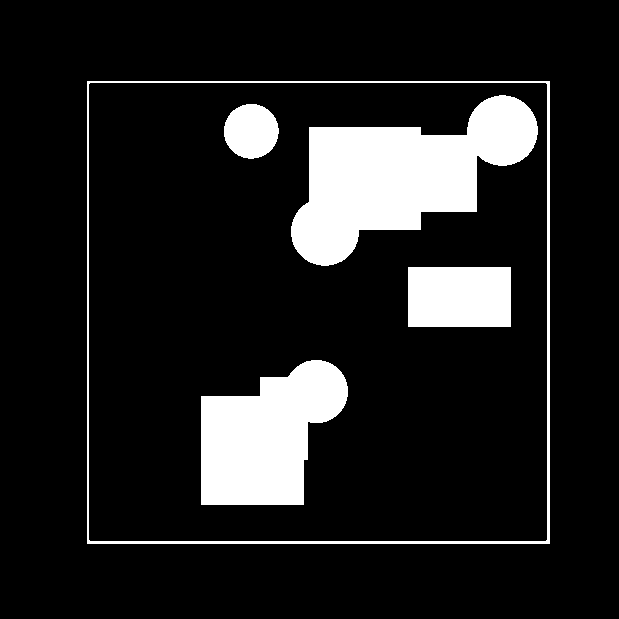

Number of obstacle pixels: 49763


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image
img = cv2.imread('maze.png')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold to create a binary obstacle mask (black = obstacle)
_, obstacle_mask = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)

# Visualize the mask
cv2_imshow(obstacle_mask)

# Optionally, get obstacle coordinates (pixels)
obstacle_pixels = np.column_stack(np.where(obstacle_mask == 255))
print(f"Number of obstacle pixels: {len(obstacle_pixels)}")


In [ ]:
import cv2
img = cv2.imread('maze.png')
height, width, _ = img.shape
print(f"Image dimensions: {width}x{height}")



Image dimensions: 619x619


In [ ]:
def world_to_pixel(node, x_min, x_max, y_min, y_max, width, height):
    # node: (x, y) in world coordinates
    x, y = node
    px = int((x - x_min) / (x_max - x_min) * (width - 1))
    py = int((y - y_min) / (y_max - y_min) * (height - 1))
    return px, py

def line_collision(node_a, node_b, obstacle_mask, x_min, x_max, y_min, y_max):
    # Sample points along the line and check for collision
    steps = int(np.ceil(np.linalg.norm(np.array(node_a) - np.array(node_b)) * 10))
    for i in range(steps + 1):
        t = i / steps
        x = node_a[0] * (1 - t) + node_b[0] * t
        y = node_a[1] * (1 - t) + node_b[1] * t
        px, py = world_to_pixel((x, y), x_min, x_max, y_min, y_max, obstacle_mask.shape[1], obstacle_mask.shape[0])
        if obstacle_mask[py, px] > 0:  # Obstacle pixel
            return False
    return True


In [ ]:
def euclidean_dist(node_a, node_b):
    return np.linalg.norm(np.array(node_a) - np.array(node_b))
def rrt(start, goal, obstacle_mask, x_min, x_max, y_min, y_max, d_step=1.0, epsilon=1.0, max_iters=2000):
    tree = [start]
    parent = {start: None}
    for _ in range(max_iters):
        # 1. Sample random node
        curr_node = (np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max))

        # 2. Find nearest node in tree
        tree_node = min(tree, key=lambda node: euclidean_dist(node, curr_node))

        # 3. Steer: move from tree_node towards curr_node by d_step
        direction = np.array(curr_node) - np.array(tree_node)
        if np.linalg.norm(direction) == 0:
            continue
        direction = direction / np.linalg.norm(direction)
        new_node = tuple(np.array(tree_node) + d_step * direction)

        # 4. Check for collision using the mask
        if line_collision(tree_node, new_node, obstacle_mask, x_min, x_max, y_min, y_max):
            tree.append(new_node)
            parent[new_node] = tree_node

            # 5. Check if goal is reached
            if euclidean_dist(new_node, goal) < epsilon:
                # Build path from start to goal
                path = [new_node]
                while path[-1] != start:
                    path.append(parent[path[-1]])
                path.reverse()
                return path, tree
    return None, tree  # No path found


In [ ]:
# Example: world is 0-10 x 0-10
x_min, x_max, y_min, y_max = 0, 10, 0, 10

# Example: convert pixel positions to world coordinates
def pixel_to_world(px, py, x_min, x_max, y_min, y_max, width, height):
    x = x_min + (px / (width - 1)) * (x_max - x_min)
    y = y_min + (py / (height - 1)) * (y_max - y_min)
    return (x, y)

start_px = (118, 112)  # from your detection
goal_px = (515, 510)
start = pixel_to_world(start_px[0], start_px[1], x_min, x_max, y_min, y_max, width, height)
goal = pixel_to_world(goal_px[0], goal_px[1], x_min, x_max, y_min, y_max, width, height)

path, tree = rrt(
    start, goal,
    obstacle_mask,
    x_min, x_max, y_min, y_max,
    d_step=0.5, epsilon=0.5, max_iters=2000
)

if path:
    print("Path found:", path)
else:
    print("No path found.")


Path found: [(1.9093851132686086, 1.812297734627832), (np.float64(1.8340064869524235), np.float64(2.306583140739205)), (np.float64(2.1728271337966465), np.float64(2.674279441063348)), (np.float64(2.372743815384284), np.float64(3.1325733646789544)), (np.float64(2.7026093288886184), np.float64(3.5083242702008466)), (np.float64(3.0612803673903604), np.float64(3.8566848393531)), (np.float64(2.838148330567783), np.float64(4.304135500480568)), (np.float64(3.185395582420249), np.float64(4.663884504761205)), (np.float64(3.5667815546300643), np.float64(4.9872182954506)), (np.float64(4.058021037947297), np.float64(4.89403154730357)), (np.float64(4.553409833100384), np.float64(4.826282439288974)), (np.float64(5.053263707088928), np.float64(4.838369815292242)), (np.float64(5.55242220412768), np.float64(4.8093733528525915)), (np.float64(5.884781977986882), np.float64(5.182919843560589)), (np.float64(6.21741757576898), np.float64(5.556220739739726)), (np.float64(6.245197829585746), np.float64(6.0554

In [ ]:
import cv2
import numpy as np

img = cv2.imread('maze.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, obstacle_mask = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)
height, width = obstacle_mask.shape


In [ ]:
def world_to_pixel(x, y, x_min, x_max, y_min, y_max, width, height):
    px = int((x - x_min) / (x_max - x_min) * (width - 1))
    py = int((y - y_min) / (y_max - y_min) * (height - 1))
    return px, py


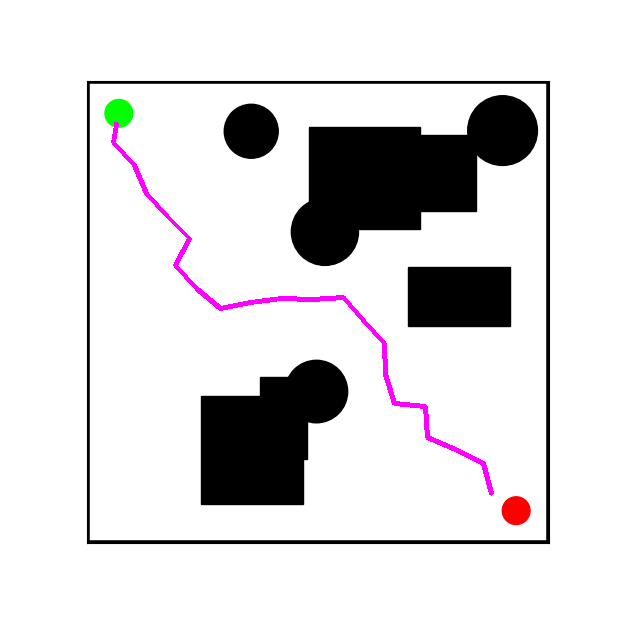

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the original image
img = cv2.imread('maze.png')
img_path = img.copy()

height, width = img.shape[:2]

# Draw the path
if path:
    for i in range(len(path) - 1):
        x1, y1 = path[i]
        x2, y2 = path[i+1]
        px1, py1 = world_to_pixel(x1, y1, x_min, x_max, y_min, y_max, width, height)
        px2, py2 = world_to_pixel(x2, y2, x_min, x_max, y_min, y_max, width, height)
        cv2.line(img_path, (px1, py1), (px2, py2), (255, 0, 255), 3)  # Magenta path

    # Optionally, mark start and goal
    px_start, py_start = world_to_pixel(start[0], start[1], x_min, x_max, y_min, y_max, width, height)
    px_goal, py_goal = world_to_pixel(goal[0], goal[1], x_min, x_max, y_min, y_max, width, height)
    cv2.circle(img_path, (px_start, py_start), 10, (0, 255, 0), -1)  # Green start
    cv2.circle(img_path, (px_goal, py_goal), 10, (0, 0, 255), -1)    # Red goal

    cv2_imshow(img_path)
else:
    print("No path found.")


In [ ]:
def euclidean_dist(node_a, node_b):
    return np.linalg.norm(np.array(node_a) - np.array(node_b))

def line_collision(node_a, node_b, obstacle_mask, x_min, x_max, y_min, y_max):
    steps = int(np.ceil(np.linalg.norm(np.array(node_a) - np.array(node_b)) * 10))
    for i in range(steps + 1):
        t = i / steps
        x = node_a[0] * (1 - t) + node_b[0] * t
        y = node_a[1] * (1 - t) + node_b[1] * t
        px, py = world_to_pixel(x, y, x_min, x_max, y_min, y_max, obstacle_mask.shape[1], obstacle_mask.shape[0])
        px = np.clip(px, 0, obstacle_mask.shape[1] - 1)
        py = np.clip(py, 0, obstacle_mask.shape[0] - 1)
        if obstacle_mask[py, px] > 0:
            return False
    return True
def rrt_star(start, goal, obstacle_mask, x_min, x_max, y_min, y_max, d_step=1.0, epsilon=1.0, max_iters=2000, radius=2.0):
    tree = [start]
    parent = {start: None}
    cost = {start: 0.0}  #track cost to come for each node
    for _ in range(max_iters):
        curr_node = (np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max))
        tree_node = min(tree, key=lambda node: euclidean_dist(node, curr_node))
        direction = np.array(curr_node) - np.array(tree_node)
        if np.linalg.norm(direction) == 0:
            continue
        direction = direction / np.linalg.norm(direction)
        new_node = tuple(np.array(tree_node) + d_step * direction)
        if not line_collision(tree_node, new_node, obstacle_mask, x_min, x_max, y_min, y_max):
            continue


        # Find neighbors within radius (instead of just nearest)
        neighbors = [node for node in tree if euclidean_dist(node, new_node) <= radius]

        # Choose the best parent (lowest cost)
        min_cost = cost[tree_node] + euclidean_dist(tree_node, new_node)
        best_parent = tree_node
        for node in neighbors:
            if line_collision(node, new_node, obstacle_mask, x_min, x_max, y_min, y_max):
                c = cost[node] + euclidean_dist(node, new_node)
                if c < min_cost:
                    min_cost = c
                    best_parent = node

        tree.append(new_node)
        parent[new_node] = best_parent
        cost[new_node] = min_cost

        # Rewire neighbors if going through new_node is better
        for node in neighbors:
            if node == best_parent:
                continue
            if line_collision(new_node, node, obstacle_mask, x_min, x_max, y_min, y_max):
                c = cost[new_node] + euclidean_dist(new_node, node)
                if c < cost[node]:
                    parent[node] = new_node
                    cost[node] = c

        if euclidean_dist(new_node, goal) < epsilon:
            goal_node = min(tree, key=lambda node: euclidean_dist(node, goal))
            path = [goal_node]
            while path[-1] != start:
                path.append(parent[path[-1]])
            path.reverse()
            return path, tree
    return None, tree


Start (pixels): (118, 112)
Goal (pixels): (515, 510)
Path found!


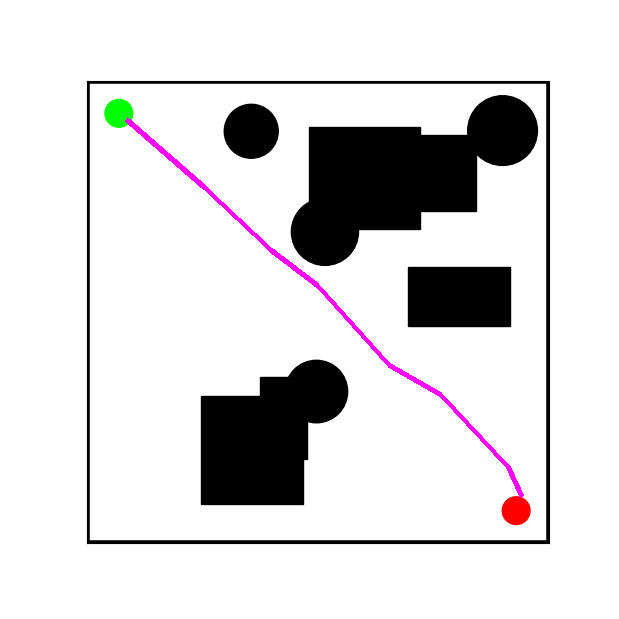

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# --- 1. Load image and create obstacle mask ---
img = cv2.imread('maze.png')
height, width = img.shape[:2]

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, obstacle_mask = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)

# --- 2. Detect start (green) and goal (red) dots ---
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Green
lower_green = np.array([40, 100, 100])
upper_green = np.array([80, 255, 255])
mask_green = cv2.inRange(hsv, lower_green, upper_green)
contours_green, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
start_px = None
for cnt in contours_green:
    (x, y), radius = cv2.minEnclosingCircle(cnt)
    start_px = (int(x), int(y))
    break

# Red
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)
contours_red, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
goal_px = None
for cnt in contours_red:
    (x, y), radius = cv2.minEnclosingCircle(cnt)
    goal_px = (int(x), int(y))
    break

print("Start (pixels):", start_px)
print("Goal (pixels):", goal_px)

# --- 3. Convert pixel positions to world coordinates ---
x_min, x_max, y_min, y_max = 0, 10, 0, 10

def pixel_to_world(px, py, x_min, x_max, y_min, y_max, width, height):
    x = x_min + (px / (width - 1)) * (x_max - x_min)
    y = y_min + (py / (height - 1)) * (y_max - y_min)
    return (x, y)

def world_to_pixel(x, y, x_min, x_max, y_min, y_max, width, height):
    px = int((x - x_min) / (x_max - x_min) * (width - 1))
    py = int((y - y_min) / (y_max - y_min) * (height - 1))
    return px, py

start = pixel_to_world(start_px[0], start_px[1], x_min, x_max, y_min, y_max, width, height)
goal = pixel_to_world(goal_px[0], goal_px[1], x_min, x_max, y_min, y_max, width, height)


# --- 4. Run RRT* ---
path, tree = rrt_star(
    start, goal,
    obstacle_mask,
    x_min, x_max, y_min, y_max,
    d_step=0.5, epsilon=0.5, max_iters=2000, radius=2.0
)

if path:
    print("Path found!")
else:
    print("No path found.")

# --- 5. Draw path on image ---
img_path = img.copy()
if path:
    for i in range(len(path) - 1):
        x1, y1 = path[i]
        x2, y2 = path[i+1]
        px1, py1 = world_to_pixel(x1, y1, x_min, x_max, y_min, y_max, width, height)
        px2, py2 = world_to_pixel(x2, y2, x_min, x_max, y_min, y_max, width, height)
        cv2.line(img_path, (px1, py1), (px2, py2), (255, 0, 255), 3)  # Magenta path

    # Optionally, mark start and goal
    px_start, py_start = world_to_pixel(start[0], start[1], x_min, x_max, y_min, y_max, width, height)
    px_goal, py_goal = world_to_pixel(goal[0], goal[1], x_min, x_max, y_min, y_max, width, height)
    cv2.circle(img_path, (px_start, py_start), 10, (0, 255, 0), -1)  # Green start
    cv2.circle(img_path, (px_goal, py_goal), 10, (0, 0, 255), -1)    # Red goal

cv2_imshow(img_path)


RRT* is clearly more smoother than basic RRT path
